In [9]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np

In [10]:
dataset = load_dataset("allenai/qasper")

Found cached dataset qasper (/home/nano/.cache/huggingface/datasets/allenai___qasper/qasper/0.3.0/2bfcd239e581ab83f9ab7b76a82e42c6bcf574a13246ae6cc5a6c357c35f96f9)


  0%|          | 0/3 [00:00<?, ?it/s]

In [11]:
def get_length_distribution_of_abstracts(abstracts):
    lengths = [len(abstract) for abstract in abstracts]
    plt.hist(np.array(lengths))
    plt.xlabel("Number of characters in abstract")
    plt.show()
    
    
def analyze_qas(qas):
    questions_per_article = []
    answers_per_question = []

    total_num_of_answers = 0
    num_free_form_answers = 0
    num_extractive_answers = 0
    num_unanswerable_questions = 0

    for qa in qas:
        question = qa['question']
        answers = qa['answers']
        
        num_of_questions = len(question)
        num_of_answers = len(answers)
        
        questions_per_article.append(num_of_questions)
        
        assert num_of_answers == num_of_questions
        
        for answer in answers:
            total_num_of_answers += len(answer['answer'])
            answers_per_question.append(len(answer['answer']))
            
            for question_answer in answer['answer']:
                if question_answer['unanswerable']: num_unanswerable_questions += 1
                if question_answer['free_form_answer']: num_free_form_answers += 1
                if question_answer['extractive_spans'] != []: num_extractive_answers += 1

    print(f"Number of Answers:                {sum(answers_per_question)}\n\
            Number of Unanswerable Questions: {num_unanswerable_questions}\n\
            Number of Free Form Answers:      {num_free_form_answers}\n\
            Number of Extractive Answers:     {num_extractive_answers}")
    plt.hist(np.array(questions_per_article))
    plt.xlabel("Number of questions per article")
    plt.show()

    plt.hist(np.array(answers_per_question))
    plt.xlabel("Number of answers per question")
    plt.show()


def exploratory_data_analysis(dataset_split):
    qas = dataset_split['qas']
    analyze_qas(qas)
    
    abstracts = dataset_split['abstract']
    get_length_distribution_of_abstracts(abstracts)



TRAIN DATASET
Number of Answers:                2675
            Number of Unanswerable Questions: 281
            Number of Free Form Answers:      622
            Number of Extractive Answers:     1363


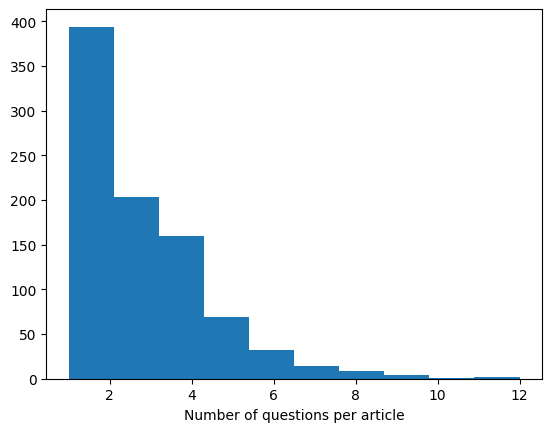

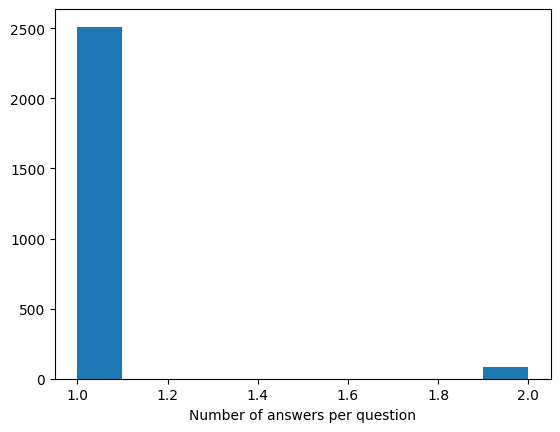

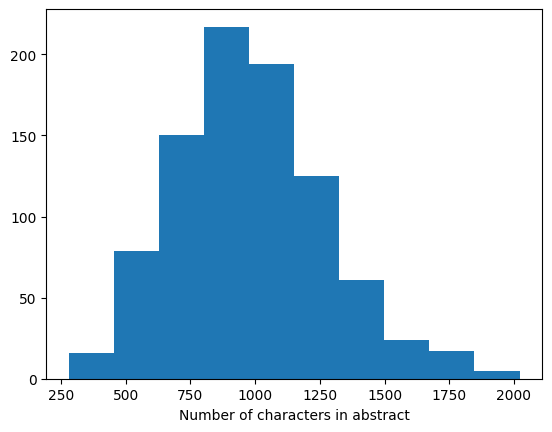



TRAIN DATASET
Number of Answers:                3554
            Number of Unanswerable Questions: 366
            Number of Free Form Answers:      878
            Number of Extractive Answers:     1817


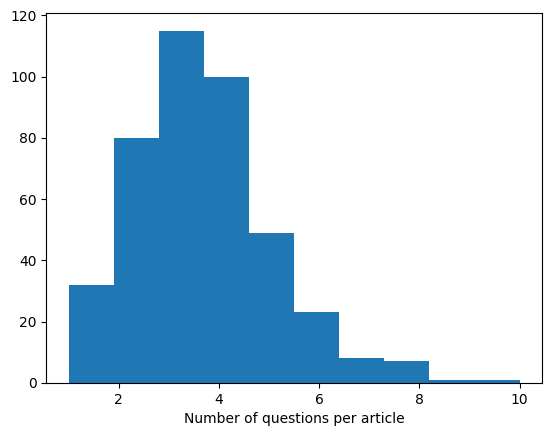

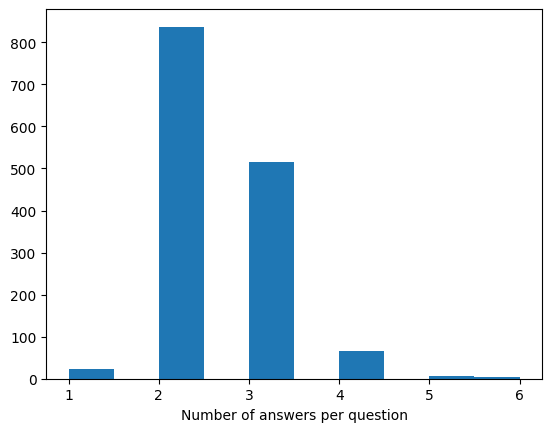

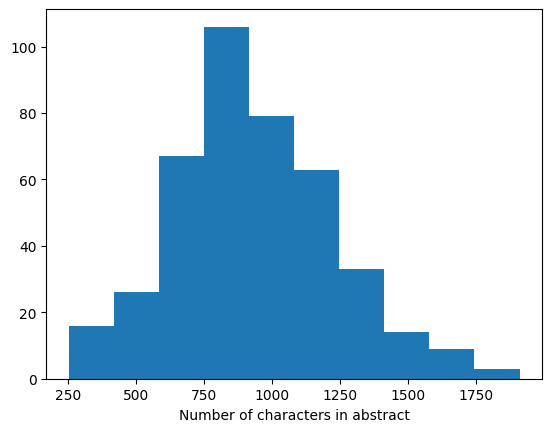

In [12]:
%matplotlib inline
print("TRAIN DATASET")
exploratory_data_analysis(dataset['train'])

print("\n\TEST DATASET")
exploratory_data_analysis(dataset['test'])